# Cleaning web-scraped data

**Priority**
- Clean up reviews
- Convert SalePrice to floats
- Bin SalePrice for our target variable
- Prepare for modeling

**Secondary**
- Clean the rest of data
- Turn Mieage into floats
- Split mpg to city and highway

In [1]:
# imports
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import numpy as np
from tqdm.notebook import tqdm
import re

In [2]:
df = pd.read_csv('carinfo.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

**Data is dirty, time to clean**

In [4]:
df

,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.","$29,000"
1,"[""2018 XTL, 4X4, 302A Package 48000 mi. Other ...",Four-wheel Drive,–,–,Automatic,5.0L V8 32V PDI DOHC,"33,548 mi.","$39,998"
2,"[""Stranded today. Could not get to work. Somet...",Front-wheel Drive,Electric,Electric,1-Speed Automatic,Electric,"62,439 mi.","$18,989"
3,"['Excellent road car, quiet, stable, comfortab...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.","$55,975"
4,"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.","$38,900"
...,...,...,...,...,...,...,...,...
9611,"['Uconnect system is awful,\r\nMost of the tim...",Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.","$25,500"
9612,['Very happy with this car. It’s great value f...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.","$35,590"
9613,['I own one and for the past two years I have ...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.","$24,000"
9614,['This car is great. It is an amazing experien...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.","$71,077"


**Grabbing priority columns**

In [5]:
data = df[['Reviews', 'SalePrice']]

**Only ~1980 unique reviews, okay for this project**
- Would like to grab more unique reviews in the future

In [6]:
data['Reviews'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

**Converting from string to float**
- getting numbers
- turning number string to float

In [7]:
data['SalePrice'] = data['SalePrice'].str.translate({ord(i): None for i in '$,'})

<ipython-input-7-da332b37bb80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SalePrice'] = data['SalePrice'].str.translate({ord(i): None for i in '$,'})


In [8]:
data

,Reviews,SalePrice
0,['Virtually nothing has gone wrong with my 202...,29000
1,"[""2018 XTL, 4X4, 302A Package 48000 mi. Other ...",39998
2,"[""Stranded today. Could not get to work. Somet...",18989
3,"['Excellent road car, quiet, stable, comfortab...",55975
4,"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",38900
...,...,...
9611,"['Uconnect system is awful,\r\nMost of the tim...",25500
9612,['Very happy with this car. It’s great value f...,35590
9613,['I own one and for the past two years I have ...,24000
9614,['This car is great. It is an amazing experien...,71077


In [9]:
data = data.loc[data['SalePrice'] != 'Not Priced']

In [10]:
data['SalePrice'] = data['SalePrice'].astype(float)

<ipython-input-10-50854e4490e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SalePrice'] = data['SalePrice'].astype(float)


In [11]:
data

,Reviews,SalePrice
0,['Virtually nothing has gone wrong with my 202...,29000.0
1,"[""2018 XTL, 4X4, 302A Package 48000 mi. Other ...",39998.0
2,"[""Stranded today. Could not get to work. Somet...",18989.0
3,"['Excellent road car, quiet, stable, comfortab...",55975.0
4,"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",38900.0
...,...,...
9611,"['Uconnect system is awful,\r\nMost of the tim...",25500.0
9612,['Very happy with this car. It’s great value f...,35590.0
9613,['I own one and for the past two years I have ...,24000.0
9614,['This car is great. It is an amazing experien...,71077.0


**Binning SalePrice for target variable**
- Seems to have good distribubtion of prices
- Use qcut to bin, use as starting point

In [12]:
data['SalePrice'].describe()

count      9608.000000
mean      38308.905287
std       22020.813784
min        2500.000000
25%       25156.500000
50%       34590.000000
75%       44991.250000
max      435500.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

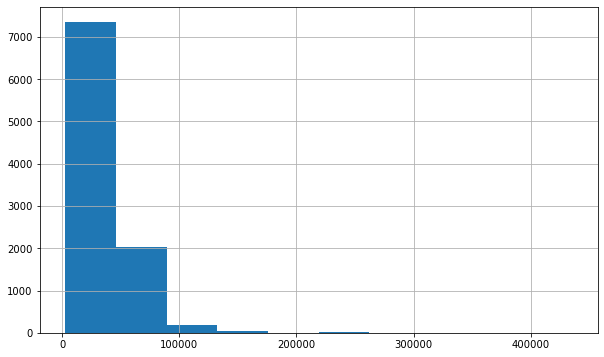

In [13]:
data['SalePrice'].hist(figsize=(10,6))

In [14]:
pd.qcut(data['SalePrice'], q=5).unique()

[(23793.2, 30710.8], (38605.4, 47993.6], (2499.999, 23793.2], (47993.6, 435500.0], (30710.8, 38605.4]]
Categories (5, interval[float64]): [(2499.999, 23793.2] < (23793.2, 30710.8] < (30710.8, 38605.4] < (38605.4, 47993.6] < (47993.6, 435500.0]]

**Outliers seem to have little effect on binning**

In [15]:
pd.qcut(data.loc[data['SalePrice'] <= 150000]['SalePrice'], q=5).unique()

[(23758.0, 30596.6], (38515.2, 47950.0], (2499.999, 23758.0], (47950.0, 149999.0], (30596.6, 38515.2]]
Categories (5, interval[float64]): [(2499.999, 23758.0] < (23758.0, 30596.6] < (30596.6, 38515.2] < (38515.2, 47950.0] < (47950.0, 149999.0]]

**Bins to be used**
- Cheap 0-22k
- Below Average 22k-30k
- Average 30k-38k
- Above Average 38k-50k
- Expensive 50k+


This is for the cars in this dataset, Google says average price in AL is 33k. Binning is okay for general idea.

In [16]:
bins = [
    (data['SalePrice'] <= 22000),
    (data['SalePrice'] > 22000) & (data['SalePrice'] <= 30000),
    (data['SalePrice'] > 30000) & (data['SalePrice'] <= 38000),
    (data['SalePrice'] > 38000) & (data['SalePrice'] <= 50000),
    (data['SalePrice'] > 50000)
    ]

# create a list of the values we want to assign for each condition
price_cat = ['Cheap', 'BelowAverage', 'Average', 'AboveAverage', 'Expensive']

# create a new column and use np.select to assign values to it using our lists as arguments
data['PriceCategory'] = np.select(bins, price_cat)

<ipython-input-16-bd3203b329c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceCategory'] = np.select(bins, price_cat)


In [17]:
data.head()

,Reviews,SalePrice,PriceCategory
0,['Virtually nothing has gone wrong with my 202...,29000.0,BelowAverage
1,"[""2018 XTL, 4X4, 302A Package 48000 mi. Other ...",39998.0,AboveAverage
2,"[""Stranded today. Could not get to work. Somet...",18989.0,Cheap
3,"['Excellent road car, quiet, stable, comfortab...",55975.0,Expensive
4,"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",38900.0,AboveAverage


**Bins seem evenly distributed**

In [18]:
data['PriceCategory'].value_counts()

AboveAverage    2276
BelowAverage    2186
Average         1923
Expensive       1632
Cheap           1591
Name: PriceCategory, dtype: int64

**Grabbing a review**
- attempt to clean it
- create new column with clean reviews

In [19]:
string = df['Reviews'][1]


In [20]:
string

'["2018 XTL, 4X4, 302A Package 48000 mi. Other than wheel bearings, the vehicle has been flawless. Lots of room and the 2.7L has pep and is economical to operate. My major complaint is OE running boards, the chrome peels. No issues with the motor or transmission. Only expense other than fluid changes was new front brakes. This vehicle is driven in Northern Ontario and performs remarkably well in snow and rough roads. The 5\' bed is perfect for our needs of hauling material for our DIY projects. We have hauled up to 3/4 yard of gravel without any difficulty It is the best vehicle I have ever owned.", "I bought my truck new on Dec 30th of 2018. I initially loved it. But my first warning sign was the engine was losing oil almost immediately- I set my oil changes for 5,000 miles. By the time I had an oil change it was right at a quart low. I thought it was a fluke and got 10,000 mile oil as I am very busy and it saves time. At 7,500 miles the truck was 2.5 Qts low on oil. I switched to 3,0

In [21]:
string = re.sub(r'\\n', '', string)
string = re.sub(r'\\r', '', string)
string = string.replace('[', '')
string = string.replace(']', '')
string = string.replace('"', '')

In [22]:
string

"2018 XTL, 4X4, 302A Package 48000 mi. Other than wheel bearings, the vehicle has been flawless. Lots of room and the 2.7L has pep and is economical to operate. My major complaint is OE running boards, the chrome peels. No issues with the motor or transmission. Only expense other than fluid changes was new front brakes. This vehicle is driven in Northern Ontario and performs remarkably well in snow and rough roads. The 5' bed is perfect for our needs of hauling material for our DIY projects. We have hauled up to 3/4 yard of gravel without any difficulty It is the best vehicle I have ever owned., I bought my truck new on Dec 30th of 2018. I initially loved it. But my first warning sign was the engine was losing oil almost immediately- I set my oil changes for 5,000 miles. By the time I had an oil change it was right at a quart low. I thought it was a fluke and got 10,000 mile oil as I am very busy and it saves time. At 7,500 miles the truck was 2.5 Qts low on oil. I switched to 3,000 mi

In [23]:
def review_cleaner(rev):
    clean = re.sub(r'\\n', '', rev)
    clean = re.sub(r'\\r', '', clean)
    clean = clean.replace('[', '')
    clean = clean.replace(']', '')
    clean = clean.replace('"', '')
    clean = clean.replace("'", "")
    return clean

In [24]:
data['Reviews'][45]

"['It fits my needs for everything I do. The Safety Features ensure that I’m safe and able to get home to my love ones. The only issue I have with it is that it doesn’t have lumbar support, and long drives can be a pain', 'This is a follow-up to my previous review. Today I had to pay the ransom to get my car back from my local Toyota service department. The leaking roof racks were replaced and after a dealership discount of $175 and an alleged Toyota discount of around $366, my portion of the bill was $1,052 PLUS an additional $140 to diagnose the problem. This is a manufacturing defect that should have been paid for in-full by the Toyota Corporation. The dealership did all they could to help but the Toyota Corporation was indifferent. This should not have happened to a 3 1/2 year old car that was largely garage kept and accident free. Lesson learned. This Toyota customer is a one-and-done.', 'Car has met all but one of our needs to date. Very economical to operate. Very nice that Toyo

In [25]:
review_cleaner(data['Reviews'][45])

'It fits my needs for everything I do. The Safety Features ensure that I’m safe and able to get home to my love ones. The only issue I have with it is that it doesn’t have lumbar support, and long drives can be a pain, This is a follow-up to my previous review. Today I had to pay the ransom to get my car back from my local Toyota service department. The leaking roof racks were replaced and after a dealership discount of $175 and an alleged Toyota discount of around $366, my portion of the bill was $1,052 PLUS an additional $140 to diagnose the problem. This is a manufacturing defect that should have been paid for in-full by the Toyota Corporation. The dealership did all they could to help but the Toyota Corporation was indifferent. This should not have happened to a 3 1/2 year old car that was largely garage kept and accident free. Lesson learned. This Toyota customer is a one-and-done., Car has met all but one of our needs to date. Very economical to operate. Very nice that Toyota has

In [26]:
data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))

<ipython-input-26-cfc12aaf38a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))


In [27]:
data['CleanReviews'][9]

'The X3 m40i is the best family vehicle. Got a decent deal from CarMax on a lightly used 2019 x3 m40i.The hk sound system sounds terrible unless you figure out how to turn off the exhaust sound that comes through the speakers (leaves little bass balance left for the music), but luckily there are a few tricks (check forums). The vehicle is a blast to drive, yet can carry the whole family and luggage anywhere.I had a few e36 m3s a while back and repairs were reasonable and easy to do a lot of stuff independently, so repair costs (only needed brakes, tires and oil in the past 30k miles) on the new BMWs did come as a bit of a shock, but being proactive helps. The vehicle has been super reliable with no mechanical issues., Love my X3 SDrive 30i, it has a very smooth ride and a very powerful turbo engine, it’s very spacious and has a very nice interior, I like the infotainment and the touchscreen, and you also have a manual control next to the gearshift. I also like the fact that the map on 

**It works :)**

In [28]:
data.head()

,Reviews,SalePrice,PriceCategory,CleanReviews
0,['Virtually nothing has gone wrong with my 202...,29000.0,BelowAverage,Virtually nothing has gone wrong with my 2020 ...
1,"[""2018 XTL, 4X4, 302A Package 48000 mi. Other ...",39998.0,AboveAverage,"2018 XTL, 4X4, 302A Package 48000 mi. Other th..."
2,"[""Stranded today. Could not get to work. Somet...",18989.0,Cheap,Stranded today. Could not get to work. Somethi...
3,"['Excellent road car, quiet, stable, comfortab...",55975.0,Expensive,"Excellent road car, quiet, stable, comfortable..."
4,"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",38900.0,AboveAverage,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO..."


**Save as csv**
- This is so we can model in a different notebook

In [29]:
#data.to_csv('cleanMVP.csv')

**Secondary**
- clean the rest of the data